In [1]:
import oceanwaves as ow
import numpy as np

In [2]:
# 0D spectrum
Sp0 = ow.Spec1()
Sp0.Tp    = 10;
Sp0.Hm0   = 1;

## 1D JONSWAP

$$ H_{m0} = p_m*\gamma^np.exp(-0.5*(T_p*f-1)^2./\sigma(f,1/T_p,s_a,s_b)^2);$$

In [3]:
Sp1 = ow.Spec1.from_jonswap(np.linspace(0.03,.3,100),Sp0.Hm0, Sp0.Tp)
print('Hm0:',Sp0.Hm0,' =?= ',Sp1.Hm0())
Sp1.plot('Sp1.png') # directly to file
Sp1

Hm0: 1  =?=  1.0


<Spectrum1D  shape:[nt: 0,nx: 0,nf:100]: "">

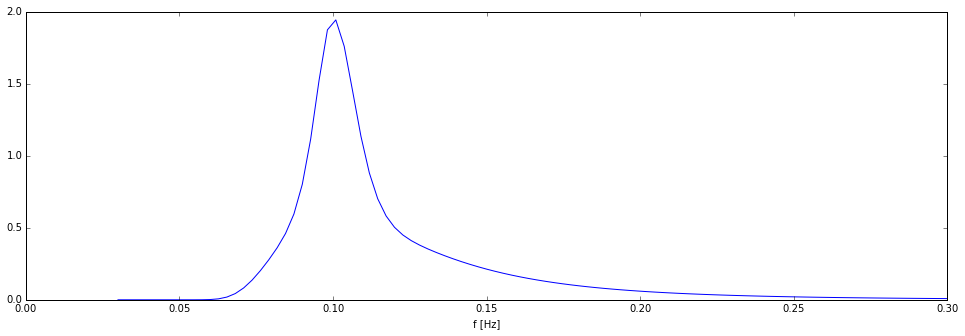

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig=plt.figure()
fig.set_figwidth(16)
fig.set_figheight(10)
ax = plt.axes([0.1,.2,0.8,0.4])
plt.plot(Sp1.f,Sp1.energy)
ax.set_xlabel('f [Hz]')

## DIRECTIONAL SPREADING

$$(2^m_s) * (\gamma(m_s/2+1))^2 / (pi * \gamma(m_s+1))$$

In [5]:
pdir = 90+45
ms = 2
units = 'deg'
dirs = [0,] + list(45+np.arange(0,136)*2.) + [360,]
cdir = ow.directional_spreading(dirs,pdir,ms,units)

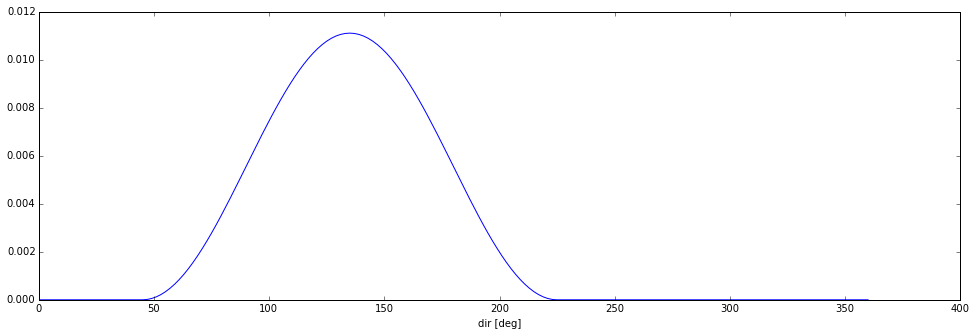

In [6]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig=plt.figure()
fig.set_figwidth(16)
fig.set_figheight(10)
ax = plt.axes([0.1,.2,0.8,0.4])
plt.plot(dirs,cdir)
ax.set_xlabel('dir [deg]')

## 2D JONSWAP

In [7]:
Sp2 = ow.Spec2.from_jonswap(np.asarray(dirs),Sp1.f,Sp0.Hm0, Sp0.Tp,pdir,ms)
print('Hm0:',Sp0.Hm0,' =?= ',Sp2.Hm0())
Sp2.plot('Sp2.png') # directly to file
Sp2

Hm0: 1  =?=  1.0


<Spectrum2D  shape:[nt: 0,nx: 0 ,nf:100,nd:138]: "">

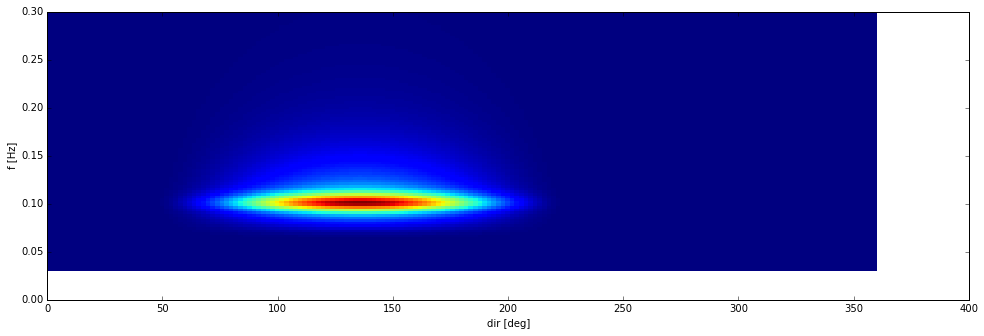

In [8]:
# Plot cartesian
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig=plt.figure()
fig.set_figwidth(16)
fig.set_figheight(10)
ax = plt.axes([0.1,.2,0.8,0.4])
plt.pcolor(Sp2.direction,Sp2.f,Sp2.energy)
#plt.pcolor(Sp2.energy)
ax.set_ylabel('f [Hz]')
ax.set_xlabel('dir [deg]')

(-0.30000000000000004,
 0.30000000000000004,
 -0.30000000000000004,
 0.30000000000000004)

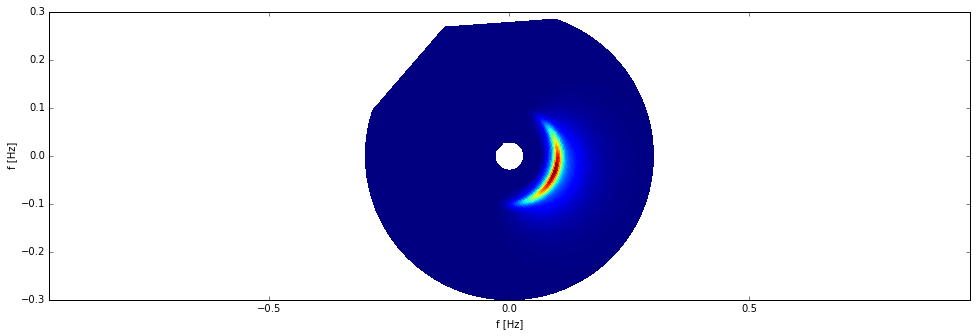

In [9]:
# Plot polar
f = np.tile(Sp2.f        ,[len(Sp2.direction),1]).T
d = np.tile(Sp2.direction,[len(Sp2.f),1])
fx = f*np.cos(90-d*np.pi/180)
fy = f*np.sin(90-d*np.pi/180)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig=plt.figure()
fig.set_figwidth(16)
fig.set_figheight(10)
ax = plt.axes([0.1,.2,0.8,0.4])
plt.pcolor(fx,fy,Sp2.energy)
ax.set_ylabel('f [Hz]')
ax.set_xlabel('f [Hz]')
plt.axis('equal')